In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


import warnings
warnings.filterwarnings('ignore')

# scikit-learn 관련
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder

from pandas import Series

feature 전처리를 한 것보다 안 한 데이터를 활용한 것이 정확도가 높았기 때문에 우선 기존의 feature들을 활용하여 다양한 모델을 돌려보자

In [54]:
df_train = pd.read_csv('/content/drive/MyDrive/data/3-7/train.csv')
df_train.drop(['id'],axis = 1, inplace = True)
df_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [61]:
train, test = train_test_split(df_train, test_size = 0.3, random_state = 42) # stratify를 활용하여 분포 비율을 맞게 나눠준다.
train_X = train[train.columns[:17]]
train_Y = train[train.columns[17:]]
test_X = test[test.columns[:17]]
test_Y = test[test.columns[17:]]
X = df_train[df_train.columns[:17]]
Y = df_train['booking_status']

* 분포 비율을 맞춘다고 정확도가 높은건 아니다?

In [62]:
# rbf-SVM
model = svm.SVC(kernel='rbf', C = 1, gamma = 0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))
print('총 {} 고객 중 {:.2f}% 정확도로 예약 취소 여부를 맞춤'. format(test_Y.shape[0], 100 * metrics.accuracy_score(prediction1, test_Y)))

Accuracy for rbf SVM is  0.7352335708630245
총 12630 고객 중 73.52% 정확도로 예약 취소 여부를 맞춤


In [63]:
# linear-SVM
model = svm.SVC(kernel='linear', C = 0.1, gamma = 0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is ', metrics.accuracy_score(prediction2, test_Y))
print('총 {} 고객 중 {:.2f}% 정확도로 예약 취소 여부를 맞춤'. format(test_Y.shape[0], 100 * metrics.accuracy_score(prediction2, test_Y)))

Accuracy for linear SVM is  0.7577197149643705
총 12630 고객 중 75.77% 정확도로 예약 취소 여부를 맞춤


In [65]:
# Logistic Regression
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logistic Regression is ', metrics.accuracy_score(prediction3, test_Y))
print('총 {} 고객 중 {:.2f}% 정확도로 예약 취소 여부를 맞춤'. format(test_Y.shape[0], 100 * metrics.accuracy_score(prediction3, test_Y)))

The accuracy of the Logistic Regression is  0.7584323040380048
총 12630 고객 중 75.84% 정확도로 예약 취소 여부를 맞춤


In [67]:
# Decision Tree
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is ', metrics.accuracy_score(prediction4, test_Y))
print('총 {} 고객 중 {:.2f}% 정확도로 예약 취소 여부를 맞춤'. format(test_Y.shape[0], 100 * metrics.accuracy_score(prediction4, test_Y)))

The accuracy of the Decision Tree is  0.7372921615201901
총 12630 고객 중 73.73% 정확도로 예약 취소 여부를 맞춤


In [68]:
# K-Nearest Neighbours(KNN)
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is ', metrics.accuracy_score(prediction5, test_Y))
print('총 {} 고객 중 {:.2f}% 정확도로 예약 취소 여부를 맞춤'. format(test_Y.shape[0], 100 * metrics.accuracy_score(prediction5, test_Y)))

The accuracy of the KNN is  0.7376880443388757
총 12630 고객 중 73.77% 정확도로 예약 취소 여부를 맞춤


* KNN의 deafualt는 5이므로 다양한 값을 넣어 비교해보자

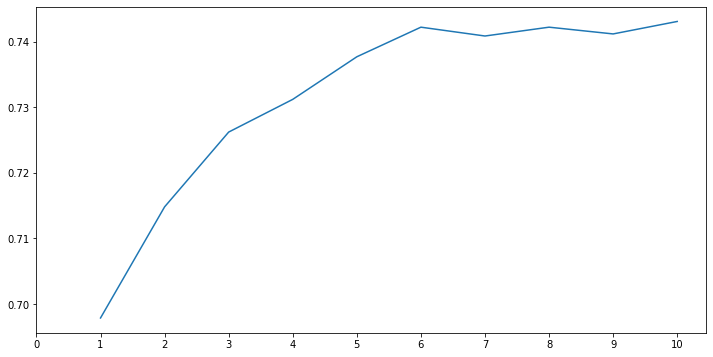

Accuracies for different values of n are:  [0.69786223 0.71480602 0.72620744 0.73119557 0.73768804 0.74220111
 0.74085511 0.74220111 0.74117181 0.74307205] with the max value as  0.7430720506730008


In [70]:
a_index = list(range(1,11))
a = pd.Series()
x = [0,1,2,3,4,5,6,7,8,9,10]

for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(train_X, train_Y)
    prediction5 = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction5, test_Y)))

plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are: ', a.values, 'with the max value as ', a.values.max())

n_neighbors = 10일 때 가장 높은 정확도를 가지고 있다.

In [64]:
# Random Forests
model = RandomForestClassifier(n_estimators = 300, max_depth = 10, criterion = 'entropy', random_state = 42)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forests is ', metrics.accuracy_score(prediction7, test_Y))
print('총 {} 고객 중 {:.2f}% 정확도로 예약 취소 여부를 맞춤'. format(test_Y.shape[0], 100 * metrics.accuracy_score(prediction7, test_Y)))

The accuracy of the Random Forests is  0.8152019002375297
총 12630 고객 중 81.52% 정확도로 예약 취소 여부를 맞춤
